In [3]:
import sys
sys.path.insert(0, '..')

In [4]:
from src.eventstream import Eventstream, EventstreamSchema, RawDataSchema
import pandas as pd

raw_data = pd.read_csv('simple-onlineshop.csv')
raw_data_schema = RawDataSchema(
    event_name="event", event_timestamp="timestamp", user_id="user_id")

source = Eventstream(
    raw_data=raw_data,
    raw_data_schema=raw_data_schema,
    schema=EventstreamSchema()
)

In [3]:
%%time
from src.tooling.cohorts import Cohorts

cohorts = Cohorts(
    eventstream=source,
)
cohorts.cohort_matrix()

CPU times: user 1.14 s, sys: 173 ms, total: 1.32 s
Wall time: 2.82 s


/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  user_retention = (cohorts.pivot('CohortPeriod', 'CohortGroup', 'TotalUsers')


CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2019-11,1.0,0.393822,0.328185,0.250965,0.247104
2019-12,1.0,0.333333,0.257028,0.232932,NaN
2020-01,1.0,0.386179,0.284553,NaN,NaN
2020-02,1.0,0.319066,NaN,NaN,NaN
2020-03,1.0,0.140000,NaN,NaN,NaN
2020-04,1.0,NaN,NaN,NaN,NaN
Average,1.0,0.314480,0.289922,0.241948,0.247104


In [6]:
%%time
from src.tooling.cohorts import Cohorts

cohorts = Cohorts(
    eventstream=source,
)
cohorts.cohort_matrix()

CPU times: user 572 ms, sys: 20.8 ms, total: 592 ms
Wall time: 767 ms


/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  user_retention = (cohorts.pivot('CohortPeriod', 'CohortGroup', 'TotalUsers')


CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2019-11,1.0,0.393822,0.328185,0.250965,0.247104
2019-12,1.0,0.333333,0.257028,0.232932,NaN
2020-01,1.0,0.386179,0.284553,NaN,NaN
2020-02,1.0,0.319066,NaN,NaN,NaN
2020-03,1.0,0.140000,NaN,NaN,NaN
2020-04,1.0,NaN,NaN,NaN,NaN
Average,1.0,0.314480,0.289922,0.241948,0.247104


CPU times: user 647 ms, sys: 103 ms, total: 750 ms
Wall time: 878 ms


/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  user_retention = (cohorts.pivot('CohortPeriod', 'CohortGroup', 'TotalUsers')


<AxesSubplot:xlabel='CohortPeriod', ylabel='CohortGroup'>

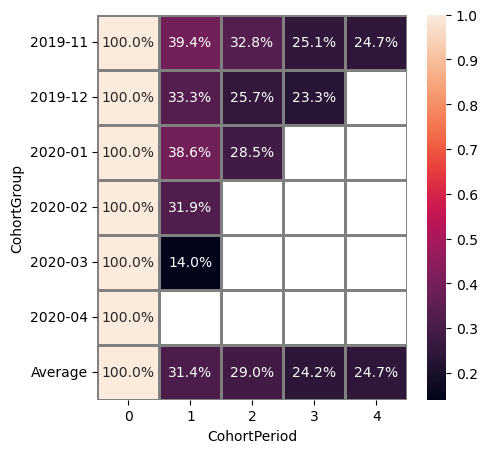

In [4]:
%%time
cohorts.cohort_heatmap(figsize=(5,5))

/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:69: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  user_retention = (cohorts.pivot('CohortPeriod', 'CohortGroup', 'TotalUsers')
/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:188: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df_matrix.columns[:coh_periods - i],
/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:188: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df_matrix.columns[:coh_periods - i],
/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/tooling/cohorts/cohorts.py:188: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=df_matrix.columns[

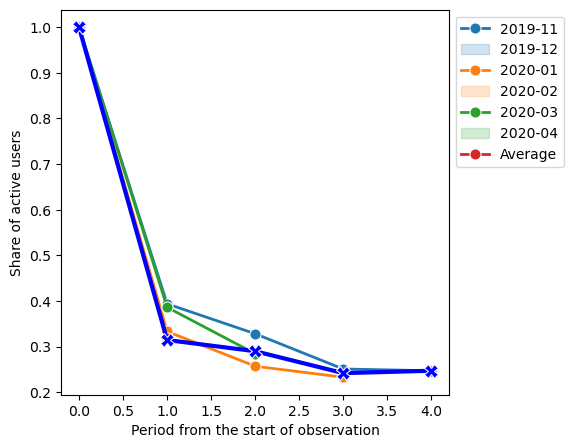

In [6]:
cohorts.cohort_lineplot(figsize=(5,5))

In [7]:
cohorts.cohort_lineplot(figsize=(5,5), average='only')

TypeError: cohort_lineplot() got an unexpected keyword argument 'average'

In [5]:
from datetime import datetime
import numpy as np
from dateutil.relativedelta import relativedelta
data = raw_data.copy()
user_col = 'user_id'
time_col = 'timestamp'
cohort_measure = 'M'
cohort_group = 1
cohort_period = 1
data[time_col] = pd.to_datetime(data[time_col])

In [6]:
periods_dict = {'D': ['days', '%Y-%m-%d'],
                        'M': ['months', '%Y-%m'],
                        'Y': ['years', '%Y']}

# data['user_min_date'] = data.groupby(user_col)[time_col].transform(min) \
#     .apply(lambda x: datetime.strptime(x.strftime(periods_dict[cohort_measure][1]),
#                                        periods_dict[cohort_measure][1]))
# data['OrderPeriod'] = data[time_col] \
#     .apply(lambda x: datetime.strptime(x.strftime(periods_dict[cohort_measure][1]),
#                                        periods_dict[cohort_measure][1]))

data['user_min_date'] = data.groupby(user_col)[time_col].transform(min)
data['user_min_date'] = pd.to_datetime(data['user_min_date'].dt.to_period('M').astype(str))

data['OrderPeriod'] = data[time_col].dt.to_period('M').astype(str)
# data['check'] = data['user_min_date_new'] == data['user_min_date']
# data['check_2'] = data['OrderPeriod_new'] == data['OrderPeriod']

data.head()

,user_id,event,timestamp,user_min_date,OrderPeriod
0,219483890,catalog,2019-11-01 17:59:13.273932,2019-11-01,2019-11
1,219483890,product1,2019-11-01 17:59:28.459271,2019-11-01,2019-11
2,219483890,cart,2019-11-01 17:59:29.502214,2019-11-01,2019-11
3,219483890,catalog,2019-11-01 17:59:32.557029,2019-11-01,2019-11
4,964964743,catalog,2019-11-01 21:38:19.283663,2019-11-01,2019-11


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35381 entries, 0 to 35380
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        35381 non-null  int64         
 1   event          35381 non-null  object        
 2   timestamp      35381 non-null  datetime64[ns]
 3   user_min_date  35381 non-null  datetime64[ns]
 4   OrderPeriod    35381 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 1.3+ MB


In [8]:
tmp = data.copy()
startdates_groups_dict = {}

end_date = tmp['user_min_date'].max()
start_date = tmp['user_min_date'].min()

coh_num = 1
uom_inside_coh_count = 1
start_date_coh = start_date.strftime(periods_dict[cohort_measure][1])

while end_date >= start_date:

    startdates_groups_dict[start_date] = [coh_num, start_date_coh]

    start_date = start_date + relativedelta(**{periods_dict[cohort_measure][0]: 1})
    uom_inside_coh_count += 1

    if uom_inside_coh_count > cohort_group:
        coh_num += 1
        uom_inside_coh_count = 1
        start_date_coh = start_date.strftime(periods_dict[cohort_measure][1])

In [9]:
startdates_groups_dict

{Timestamp('2019-11-01 00:00:00'): [1, '2019-11'],
 Timestamp('2019-12-01 00:00:00'): [2, '2019-12'],
 Timestamp('2020-01-01 00:00:00'): [3, '2020-01'],
 Timestamp('2020-02-01 00:00:00'): [4, '2020-02'],
 Timestamp('2020-03-01 00:00:00'): [5, '2020-03'],
 Timestamp('2020-04-01 00:00:00'): [6, '2020-04']}

In [10]:
cohorts_list = pd.DataFrame.from_dict(startdates_groups_dict, orient='index').reset_index()
cohorts_list.columns = ['user_min_date', 'coh_num', 'to_period']
cohorts_list = cohorts_list[['user_min_date', 'coh_num']]

In [14]:
def _find_coh_group(x):
    x = x.min()
    return startdates_groups_dict.get(x)[1]


data['OrderPeriod'] = pd.to_datetime(data['OrderPeriod'].astype(str))

data['CohortPeriod'] = ((data['OrderPeriod'] - data['user_min_date'] + cohort_group) // cohort_period) + 1
data.loc[data['CohortPeriod'] < 0, 'CohortPeriod'] = 0

TypeError: Addition/subtraction of integers and integer-arrays with TimedeltaArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [22]:
%%time
data['CohortGroup'] = pd.to_datetime(data.groupby('user_min_date')['user_min_date'].transform(_find_coh_group).astype(str))

CPU times: user 13.2 ms, sys: 2.59 ms, total: 15.8 ms
Wall time: 14.6 ms


In [15]:
data

,user_id,event,timestamp,user_min_date,OrderPeriod,CohortGroup_new,CohortGroup
0,219483890,catalog,2019-11-01 17:59:13.273932,2019-11-01,2019-11-01,1,2019-11-01
1,219483890,product1,2019-11-01 17:59:28.459271,2019-11-01,2019-11-01,1,2019-11-01
2,219483890,cart,2019-11-01 17:59:29.502214,2019-11-01,2019-11-01,1,2019-11-01
3,219483890,catalog,2019-11-01 17:59:32.557029,2019-11-01,2019-11-01,1,2019-11-01
4,964964743,catalog,2019-11-01 21:38:19.283663,2019-11-01,2019-11-01,1,2019-11-01
...,...,...,...,...,...,...,...
35376,501098384,catalog,2020-04-29 12:47:40.975732,2020-04-01,2020-04-01,6,2020-04-01
35377,501098384,catalog,2020-04-29 12:48:01.809577,2020-04-01,2020-04-01,6,2020-04-01
35378,501098384,main,2020-04-29 12:48:01.938488,2020-04-01,2020-04-01,6,2020-04-01
35379,501098384,catalog,2020-04-29 12:48:06.595390,2020-04-01,2020-04-01,6,2020-04-01


In [26]:
%%time
data['CohortGroup_new'] = data[['user_min_date']].merge(cohorts_list, on='user_min_date', how='left')['coh_num']

CPU times: user 6.94 ms, sys: 3.99 ms, total: 10.9 ms
Wall time: 9.06 ms


In [143]:
from dateutil.relativedelta import relativedelta
data[time_col][100] + relativedelta(months=1)
ex = pd.to_datetime(datetime(2021,2,3,5,13,3,9099))
pd.to_datetime(data[time_col][100].to_pydatetime()) + np.timedelta64(1, 'M')

In [75]:
DATETIME_UNITS = ["Y", "M", "W", "D", "h", "m", "s", "ms", "us", "μs", "ns", "ps", "fs", "as"]

In [144]:
unit = 'D'
index_ = DATETIME_UNITS.index(unit)
new_list = DATETIME_UNITS[:index_+1]